In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

['.ipynb_checkpoints', 'AI.jpg', 'heart_disease_dataset.csv', 'heart_disease_predictor_model.ipynb', 'heart_disease_predictor_model.py']


In [2]:
data=pd.read_csv("heart_disease_dataset.csv")

In [3]:
data.shape

(303, 14)

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
y=data["target"]

In [7]:
data.groupby("target").size()

target
0    138
1    165
dtype: int64

In [8]:
data.size

4242

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


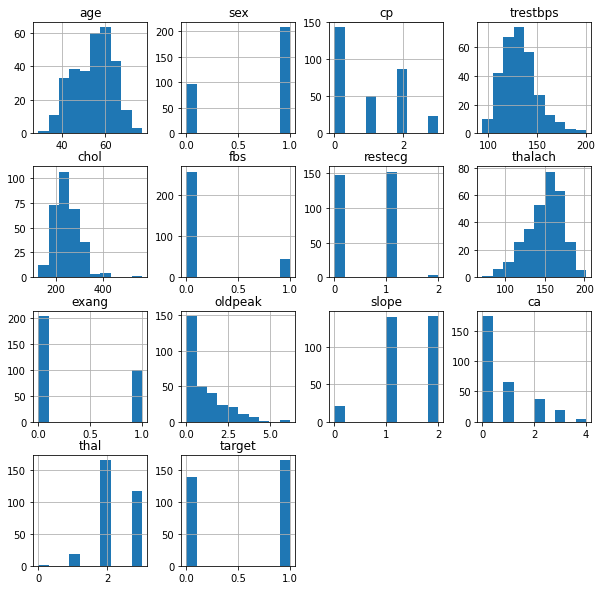

In [11]:
data.hist(figsize=(10,10))
plt.show()

<AxesSubplot:xlabel='sex', ylabel='target'>

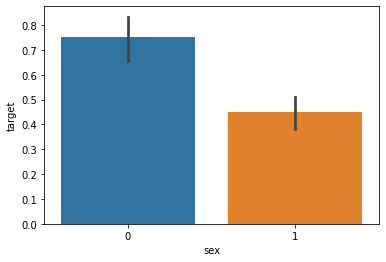

In [12]:
sns.barplot(data["sex"],data["target"])

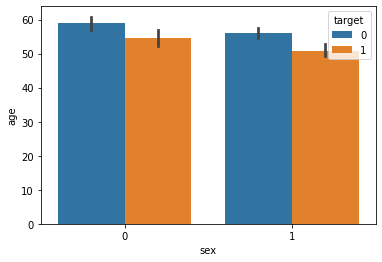

In [13]:
sns.barplot(data["sex"],data["age"],hue=data["target"])
plt.show()

In [14]:
numeric_coloumns=["trestbps","chol","age","oldpeak","thalach"]

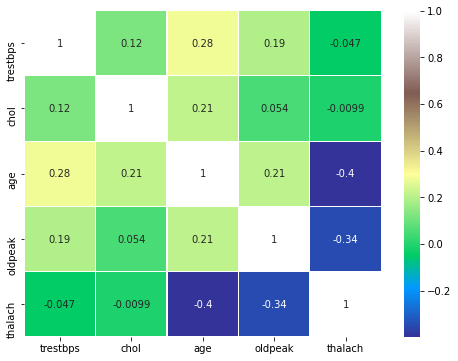

In [15]:
sns.heatmap(data[numeric_coloumns].corr(),annot=True,cmap='terrain',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

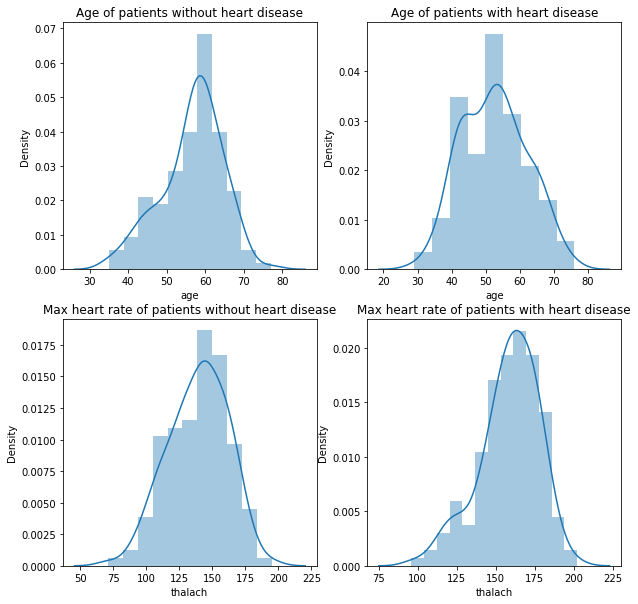

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.distplot(data[data['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(data[data['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(data[data['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(data[data['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

In [17]:
#DATA PREPROCESSING

In [18]:
X,y=data.loc[:,:"thal"],data["target"]

In [19]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
#DATA PREPROCESSING FOR KNN ONLY 

#from sklearn.preprocessing import StandardScaler

#std=StandardScaler().fit(X)
#X_std=std.transform(X)

In [22]:
#X_std

In [23]:
#SPLITTING THE DATA SET INTO TRAIN & TEST

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [26]:
X_train.shape

(212, 13)

In [27]:
X_test.shape

(91, 13)

In [28]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [29]:
y_train.shape

(212,)

In [30]:
y_test.shape

(91,)

In [31]:
#IMPLEMENTING USING DECISION TREE CLASSIFIER ALGORITHM

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=10)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [33]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [34]:
prediction=dt.predict(X_test)

In [35]:
prediction

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0], dtype=int64)

In [36]:
accuracy_dt=accuracy_score(y_test,prediction)*100

In [37]:
accuracy_dt

74.72527472527473

In [38]:
dt.feature_importances_

array([0.05482313, 0.03461456, 0.33832546, 0.06825922, 0.08967398,
       0.        , 0.        , 0.08423129, 0.06020204, 0.04800373,
       0.0792335 , 0.12741664, 0.01521646])

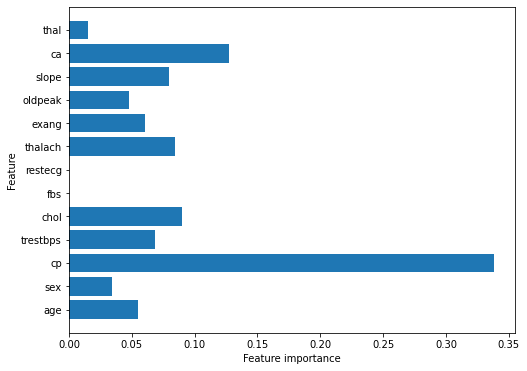

In [39]:
def plot_feature_importances(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances(dt)
plt.savefig('feature_importance')

In [61]:
#IMPLEMENTING USING DECISION TREE CLASSIFIER

In [41]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [42]:
category=['No the patient is not having heart disease','Yes the patient is having heart disease please consult with a heart specialist']

In [43]:
#CHECKING WITH CUSTOM DATA

In [44]:
custom_data=np.array([[41,0,1,130,204,0,0,172,0,1.4,2,0,2]])

In [45]:
custom_data_prediction_dt=dt.predict(custom_data)

In [46]:
int(custom_data_prediction_dt)

1

In [47]:
print(category[int(custom_data_prediction_dt)])

Yes the patient is having heart disease please consult with a heart specialist


In [48]:
#IMPLEMENTING USING KNN ALGORITHM

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [50]:
prediction_knn=knn.predict(X_test)

In [51]:
accuracy_knn=accuracy_score(y_test,prediction_knn)*100

In [52]:
accuracy_knn

67.03296703296702

In [53]:
#CHECKING WITH CUSTOM DATA

In [54]:
custom_data=np.array([[41,0,1,130,204,0,0,172,0,1.4,2,0,2]])

In [55]:
custom_data_prediction_knn=knn.predict(custom_data)

In [56]:
int(custom_data_prediction_knn)

1

In [57]:
print(category[int(custom_data_prediction_knn)])

Yes the patient is having heart disease please consult with a heart specialist


In [58]:
#BEST RANGE OF KNN

In [59]:
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    scores_list.append(accuracy_score(y_test,prediction_knn))

In [62]:
scores

{1: 0.6373626373626373,
 2: 0.6153846153846154,
 3: 0.5934065934065934,
 4: 0.6703296703296703,
 5: 0.6373626373626373,
 6: 0.6813186813186813,
 7: 0.6483516483516484,
 8: 0.6593406593406593,
 9: 0.6153846153846154,
 10: 0.6483516483516484,
 11: 0.6153846153846154,
 12: 0.6043956043956044,
 13: 0.5824175824175825,
 14: 0.5824175824175825,
 15: 0.6373626373626373,
 16: 0.6593406593406593,
 17: 0.6153846153846154,
 18: 0.6373626373626373,
 19: 0.6153846153846154,
 20: 0.6373626373626373,
 21: 0.6483516483516484,
 22: 0.6593406593406593,
 23: 0.6483516483516484,
 24: 0.6483516483516484,
 25: 0.6153846153846154}

In [63]:
scores_list

[0.6373626373626373,
 0.6153846153846154,
 0.5934065934065934,
 0.6703296703296703,
 0.6373626373626373,
 0.6813186813186813,
 0.6483516483516484,
 0.6593406593406593,
 0.6153846153846154,
 0.6483516483516484,
 0.6153846153846154,
 0.6043956043956044,
 0.5824175824175825,
 0.5824175824175825,
 0.6373626373626373,
 0.6593406593406593,
 0.6153846153846154,
 0.6373626373626373,
 0.6153846153846154,
 0.6373626373626373,
 0.6483516483516484,
 0.6593406593406593,
 0.6483516483516484,
 0.6483516483516484,
 0.6153846153846154]

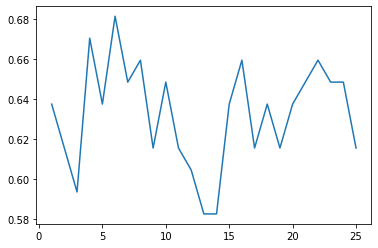

In [64]:
plt.plot(k_range,scores_list)

In [ ]:
#COMPARING BOTH ALGORITHMS

In [65]:
algorithms=['Decision Tree','KNN']
scores=[accuracy_dt,accuracy_knn]

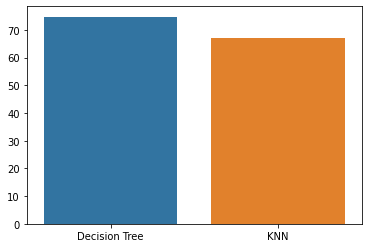

In [66]:
sns.barplot(algorithms,scores)
plt.show()

In [ ]:
#END